# Визуализация

### Морфология, часть вторая

Так как здесь не используется Mystem, можно взять больший файл для обработки

In [116]:
with open('cinics.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [104]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\M\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [105]:
%%time

from nltk.tokenize import word_tokenize

tokens = word_tokenize(text)
print(tokens[0:100])

['Анатолий', 'Мариенгоф', '.', 'Циники', 'роман', 'Почему', 'может', 'быть', 'признан', 'виновным', 'историк', ',', 'верно', 'следующий', 'мельчайшим', 'подробностям', 'рассказа', ',', 'находящегося', 'в', 'его', 'распоряжении', '?', 'Его', 'ли', 'вина', ',', 'если', 'действующие', 'лица', ',', 'соблазненные', 'страстями', ',', 'которых', 'он', 'не', 'разделяет', ',', 'к', 'несчастью', 'для', 'него', 'совершают', 'действия', 'глубоко', 'безнравственные', '.', 'Стендаль', 'Вы', 'очень', 'наблюдательны', ',', 'Глафира', 'Васильевна', '.', 'Это', 'все', 'очень', 'верно', ',', 'но', 'не', 'сами', 'ли', 'вы', 'говорили', ',', 'что', ',', 'чтобы', 'угодить', 'на', 'общий', 'вкус', ',', 'надо', 'себя', '``', 'безобразить', "''", '.', 'Согласитесь', ',', 'это', 'очень', 'большая', 'жертва', ',', 'для', 'которой', 'нужно', 'своего', 'рода', 'геройство', '.', 'Лесков', '%', '*', '1918']
Wall time: 1.67 s


Использовать выдачу с предыдущего семинара довольно бессмысленно, так как прощне изменить код для параметров выдачи, чем пытаться распарсить уже полученое

In [106]:
%%time
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

result = []

for token in tokens:
    t_word = {}
    words = morph.parse(token)
    t_word['word'] = words[0][0]
    t_word['normal_form'] = words[0][2]
    t_word['score'] = words[0][3]
    t_word['POS'] = words[0].tag.POS
    t_word['animacy'] = words[0].tag.animacy
    t_word['aspect'] = words[0].tag.aspect
    t_word['case'] = words[0].tag.case
    t_word['gender'] = words[0].tag.gender
    t_word['involvement'] = words[0].tag.involvement
    t_word['mood'] = words[0].tag.mood
    t_word['number'] = words[0].tag.number
    t_word['person'] = words[0].tag.person
    t_word['tense'] = words[0].tag.tense
    t_word['transitivity'] = words[0].tag.transitivity
    t_word['voice'] = words[0].tag.voice
    result.append(t_word)


Wall time: 28.5 s


Таблица в Pandas:

In [172]:
import pandas as pd

df = pd.DataFrame(result)

df

,POS,animacy,aspect,case,gender,involvement,mood,normal_form,number,person,score,tense,transitivity,voice,word
0,NOUN,anim,None,nomn,masc,None,None,анатолий,sing,None,0.947368,None,None,None,анатолий
1,NOUN,inan,None,nomn,masc,None,None,мариенгоф,sing,None,0.333333,None,None,None,мариенгоф
2,None,None,None,None,None,None,None,.,None,None,1.000000,None,None,None,.
3,NOUN,anim,None,nomn,masc,None,None,циник,plur,None,1.000000,None,None,None,циники
4,NOUN,anim,None,nomn,masc,None,None,роман,sing,None,0.083333,None,None,None,роман
5,ADVB,None,None,None,None,None,None,почему,None,None,1.000000,None,None,None,почему
6,VERB,None,impf,None,None,None,indc,мочь,sing,3per,0.944444,pres,intr,None,может
7,INFN,None,impf,None,None,None,None,быть,None,None,1.000000,None,intr,None,быть
8,ADJS,None,None,None,masc,None,None,признанный,sing,None,0.500000,None,None,None,признан
9,ADJF,None,None,ablt,masc,None,None,виновный,sing,None,0.200000,None,None,None,виновным


Графики из семинара

Text(0, 0.5, 'number of entries')

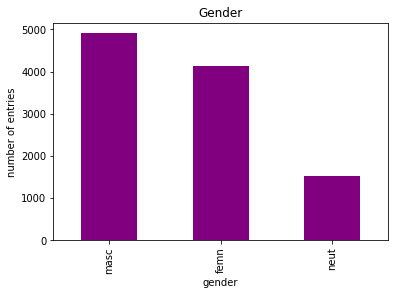

In [159]:
import matplotlib.pyplot as plt

df['gender'].value_counts().plot.bar(color='purple'); # барплот сразу из датафрейма
plt.title('Gender')
plt.xlabel('gender')
plt.ylabel('number of entries')

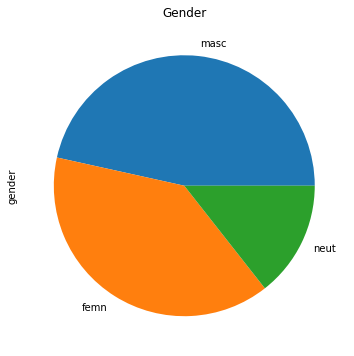

In [161]:
plt.figure(figsize=(6, 6))
df['gender'].value_counts().plot(kind='pie');
plt.title('Gender');

In [171]:
df2 = df['gender']
    ['POS', 'gender', 'number'].groupby(['POS', 'gender'], as_index=False).count()

df2.columns = ['POS', 'gender', 'total']
sns.barplot(x="POS", y="total", hue='gender', data=df2)
plt.title('Gender by POS')
plt.xlabel('POS')
plt.ylabel('number of entries');

IndentationError: unexpected indent (<ipython-input-171-d1a78b05a3c1>, line 2)

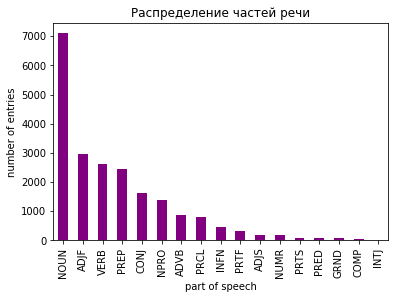

In [167]:
import matplotlib.pyplot as plt
df['POS'].value_counts().plot.bar(color='purple'); # барплот сразу из датафрейма
plt.title('Распределение частей речи')
plt.xlabel('part of speech')
plt.ylabel('number of entries');

Соотношение разных частей речи в тексте можно сравнить с их соотношением для корпуса в целом и для корпуса дневников

### Графики для заданий 3 и 4

In [109]:
!pip install wordcloud

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\M\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [1]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

stops = set(stopwords.words('russian') + ['это', 'весь', 'который', 'мочь', 'свой', 'на'])
print(stopwords.words('russian'))

ModuleNotFoundError: No module named 'wordcloud'

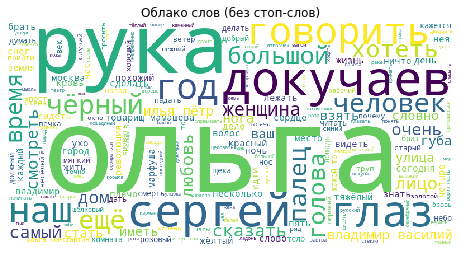

In [111]:
import matplotlib.pyplot as plt

text_cloud = ' '.join(w for w in df['normal_form'].values if w not in stops)

wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 400, 
).generate(text_cloud)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако слов (без стоп-слов)')
plt.show()

### Задание 4. Dispersion

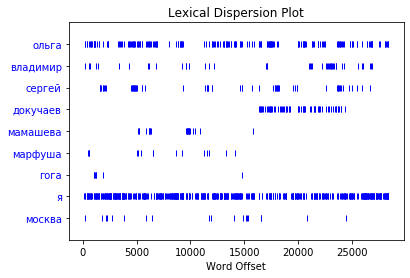

In [112]:
from nltk.draw import dispersion_plot

dispersion_plot(df['normal_form'], ['ольга', 'владимир','сергей', 'докучаев', 
                                    'мамашева', 'марфуша', 'гога', 'я', 'москва'])

В этом романе повествование ведётся от первого лица, повествующего героя зовут Владимиром, и обращается к нему по имени чаще всего Ольга. "Я" в большинстве случаев -- почти наверняка о нём же. "Ольга" встречается и в обращениях Владимира, и в собственно повествовании. Сергей появляется эпизодами, Докучаев --  олько в одном участке повествования. Марфуша ишрает некоторую роль в начале повнествования, но редко проявляется в конце. Гога также появдяется в двух-трёх эпизодах. Всё действие происходит в Москве, и её образ для романа значим.

## Визуализация оригинальная

### Частотность по тем частям, на которые разделён роман

Можно сказать, что сходную инофрмацию можно получить из предыдущего графика, однако это не вполне так. Части (сложно назвать их главами) разной длины и, в принципе, их можно разделить на несколько тем. Есть части, содержащие сводки новостей, есть - размышления Владимира, есть - размышления героя. Они различаются и по содержанию, и по длине. И можно подсчитать распределение не для всего романа, а для частей.

In [134]:
text_first = text.split(' % * ')
not_splitted_parts = {}
for text_years in text_first:
    first = text_years.split('* %')
    if len(first) > 1:
        not_splitted_parts[first[0]] = first[1]

In [133]:
all_d = {}
for year, part_year in not_splitted_parts.items():
    list_of_parts = {}
    parts_parts = part_year.split('\n\n %')
    for part in parts_parts:
        if part:
            part_d = part.split('%\n')
            list_of_parts[int(part_d[0])] = part_d[1].strip(' \n')
    all_d[year] = list_of_parts

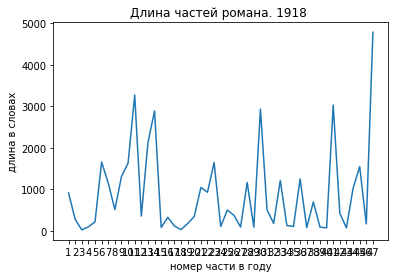

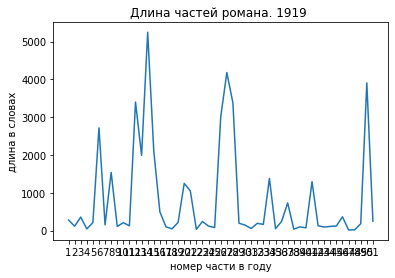

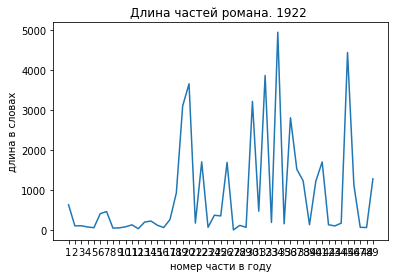

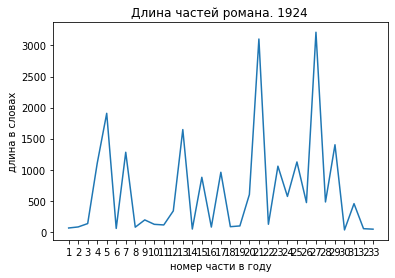

In [139]:
for year, year_data in all_d.items():
    X = []
    Y = []
    for number, part in year_data.items():
        X.append(number)
        Y.append(len(part))

    plt.plot(X, Y) # рисуем график - последовательно соединяем точки с координатами из X и Y
    plt.title('Длина частей романа. ' + year) # заголовок
    plt.ylabel('длина в словах') # подпись оси Х
    plt.xlabel('номер части в году') # подпись оси Y
    plt.show()

Из графиков видно, что разброс длины частей достаточно велик и неравномерен. Теперь можно посмотреть на распределённость имён героев по частям.

In [175]:
all_parsed_data = {}

for year, year_data in all_d.items():
    result_part = {}
    for number, part in year_data.items():
        part_tokens = word_tokenize(part)
        morph_part = MorphAnalyzer()
        one_word = []
        for token in part_tokens:
            t_word = {}
            words = morph_part.parse(token)
            t_word['word'] = words[0][0]
            t_word['normal_form'] = words[0][2]
            one_word.append(t_word)
        '''t_word['score'] = words[0][3]
        t_word['POS'] = words[0].tag.POS
        t_word['animacy'] = words[0].tag.animacy
        t_word['aspect'] = words[0].tag.aspect
        t_word['case'] = words[0].tag.case
        t_word['gender'] = words[0].tag.gender
        t_word['involvement'] = words[0].tag.involvement
        t_word['mood'] = words[0].tag.mood
        t_word['number'] = words[0].tag.number
        t_word['person'] = words[0].tag.person
        t_word['tense'] = words[0].tag.tense
        t_word['transitivity'] = words[0].tag.transitivity
        t_word['voice'] = words[0].tag.voice''' 
        result_part[number] = one_word
    all_parsed_data[year] = result_part
    

In [168]:
for year, year_data in all_parsed_data.items():
    olga_freq = []
    vladimir_freq = []
    serge_freq = []
    dokuchaev_freq = []
    parts_number = []
    for number, list_words in year_data.items():
        parts_number.append(number)
        olga = 0
        vladimir = 0
        serge = 0
        dokuchaev = 0
        for one_word in list_words:
            for keys, values in one_word.items():
                if keys == 'normal_form':
                    if values == 'ольга':
                        olga = olga + 1
                    elif values == 'владимир':
                        vladimir = vladimir + 1
                    elif values == 'сергей':
                        serge = serge + 1
                    elif values == 'докучаев':
                        dokuchaev = dokuchaev + 1
        olga_freq.append(olga)
        vladimir_freq.append(vladimir)
        serge_freq.append(serge)
        dokuchaev_freq.append(dokuchaev)
    print(olga_freq)
    

[2, 0, 0, 0, 0, 4, 3, 0, 6, 3, 1, 0, 4, 0, 0, 1, 0, 0, 0, 1, 2, 1, 1, 0, 1, 0, 0, 4, 0, 6, 2, 1, 3, 0, 0, 2, 0, 0, 0, 0, 7, 0, 0, 1, 6, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 7, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 6, 6, 7, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 14, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 9, 0, 4, 0, 4, 0, 1, 3, 0, 0, 0, 0, 4, 0, 0, 4]
[0, 0, 0, 2, 0, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 3, 1, 5, 0, 0, 0, 2, 0, 3, 0, 2, 1, 0]


Здесь должен был быть сложный график со многими значениями на одном, но я не успела разобраться и он пока не работает, посему пока отправлю так